## Problem Statement
This project seeks to analyse the  marketing campaign data of a bank to optimize its marketing campaigns to attract more customers to term deposit subscription.

### Objective
- Develop a Deep Learning model to predict the marketing campaign outcome of whether or not a customer of the bank wil make  term deposit.
- Evaluate the model's performance using relevant evaluation metrics

#### Data Features: age, job, marital, education, default, balance,	housing, loan, contact,day,	month,	duration,	campaign,	pdays,	previous,	poutcome, and deposit.



In [ ]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification


In [ ]:
# Import the data
Bank_Customer_Data = pd.read_csv("c:\\Users\\HP\\Documents\\STUDY\\DATA SCIENCE AND ANALYSIS - GOMYCODE\\Data Sets\\bank.csv")
Bank_Customer_Data.tail(10)

age          job  marital  education default  balance housing loan  \
11152   34    housemaid  married  secondary      no      390     yes   no   
11153   43       admin.   single  secondary      no       35      no   no   
11154   52   technician  married   tertiary      no      523     yes  yes   
11155   35  blue-collar  married  secondary      no       80     yes  yes   
11156   34  blue-collar   single  secondary      no      -72     yes   no   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
11152   cellular   15   jul       659         3     -1         0  unknown   
11153  telephone    9   nov       208         1     -1         0  unknown   
11154   cellular    8   jul       113         1     -1         0  unknown   
11155   cellular   21   nov        38         2    172         2  failure   
11156   cellular    7   jul       273         5     -1         0  unknown   
11157   cellular   20   apr       257         1     -1         0  unknown   
11158    unknown   16   jun        83         4     -1         0  unknown   
11159   cellular   19   aug       156         2     -1         0  unknown   
11160   cellular    8   may         9         2    172         5  failure   
11161   cellular    9   jul       628         1     -1         0  unknown   

      deposit  
11152      no  
11153      no  
11154      no  
11155      no  
11156      no  
11157      no  
11158      no  
11159      no  
11160      no  
11161      no

In [ ]:
# Determine the features of the data:
Bank_Customer_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
# Determine the properties of the data:
Bank_Customer_Data.describe()

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

In [ ]:
# Determine the missing values of the data:
Bank_Customer_Data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
# Count duplicate rows
duplicate_count = Bank_Customer_Data.duplicated().sum()
print(f"\nTotal Duplicate Rows: {duplicate_count}")



Total Duplicate Rows: 0


In [ ]:
# Check for invalid or inconsistent values (negative values in positive-only columns)
for col in Bank_Customer_Data.columns:
    if Bank_Customer_Data[col].dtype in ['int64', 'float64']: 
        if Bank_Customer_Data[col].min() < 0:
            print(f"Negative values found in column {col}")
    elif Bank_Customer_Data[col].dtype == 'object':  
        if Bank_Customer_Data[col].nunique() > 10: 
            print(f"High cardinality in column {col}")

High cardinality in column job
Negative values found in column balance
High cardinality in column month
Negative values found in column pdays


In [ ]:
# Data Preprocessing

# activate the file on the ydata profile
from ydata_profiling import ProfileReport

# Generate the profile report
Africa_Financial_Inclusion_Data_Profile = ProfileReport(Bank_Customer_Data, title = "Bank Customer Data Analysis")
Africa_Financial_Inclusion_Data_Profile.to_notebook_iframe()
Africa_Financial_Inclusion_Data_Profile.to_file("Bank Customer Data Analysis.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
"""Encoding columns with categorical data"""
le = LabelEncoder()

# List of categorical columns to encode with LabelEncoder
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',	'poutcome',	'deposit']

# Apply LabelEncoder to each column
for col in categorical_cols:
    Bank_Customer_Data[col] = le.fit_transform(Bank_Customer_Data[col])
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{label}: {code}")
    print() 

Column: job
admin.: 0
blue-collar: 1
entrepreneur: 2
housemaid: 3
management: 4
retired: 5
self-employed: 6
services: 7
student: 8
technician: 9
unemployed: 10
unknown: 11

Column: marital
divorced: 0
married: 1
single: 2

Column: education
primary: 0
secondary: 1
tertiary: 2
unknown: 3

Column: default
no: 0
yes: 1

Column: housing
no: 0
yes: 1

Column: loan
no: 0
yes: 1

Column: contact
cellular: 0
telephone: 1
unknown: 2

Column: month
apr: 0
aug: 1
dec: 2
feb: 3
jan: 4
jul: 5
jun: 6
mar: 7
may: 8
nov: 9
oct: 10
sep: 11

Column: poutcome
failure: 0
other: 1
success: 2
unknown: 3

Column: deposit
no: 0
yes: 1



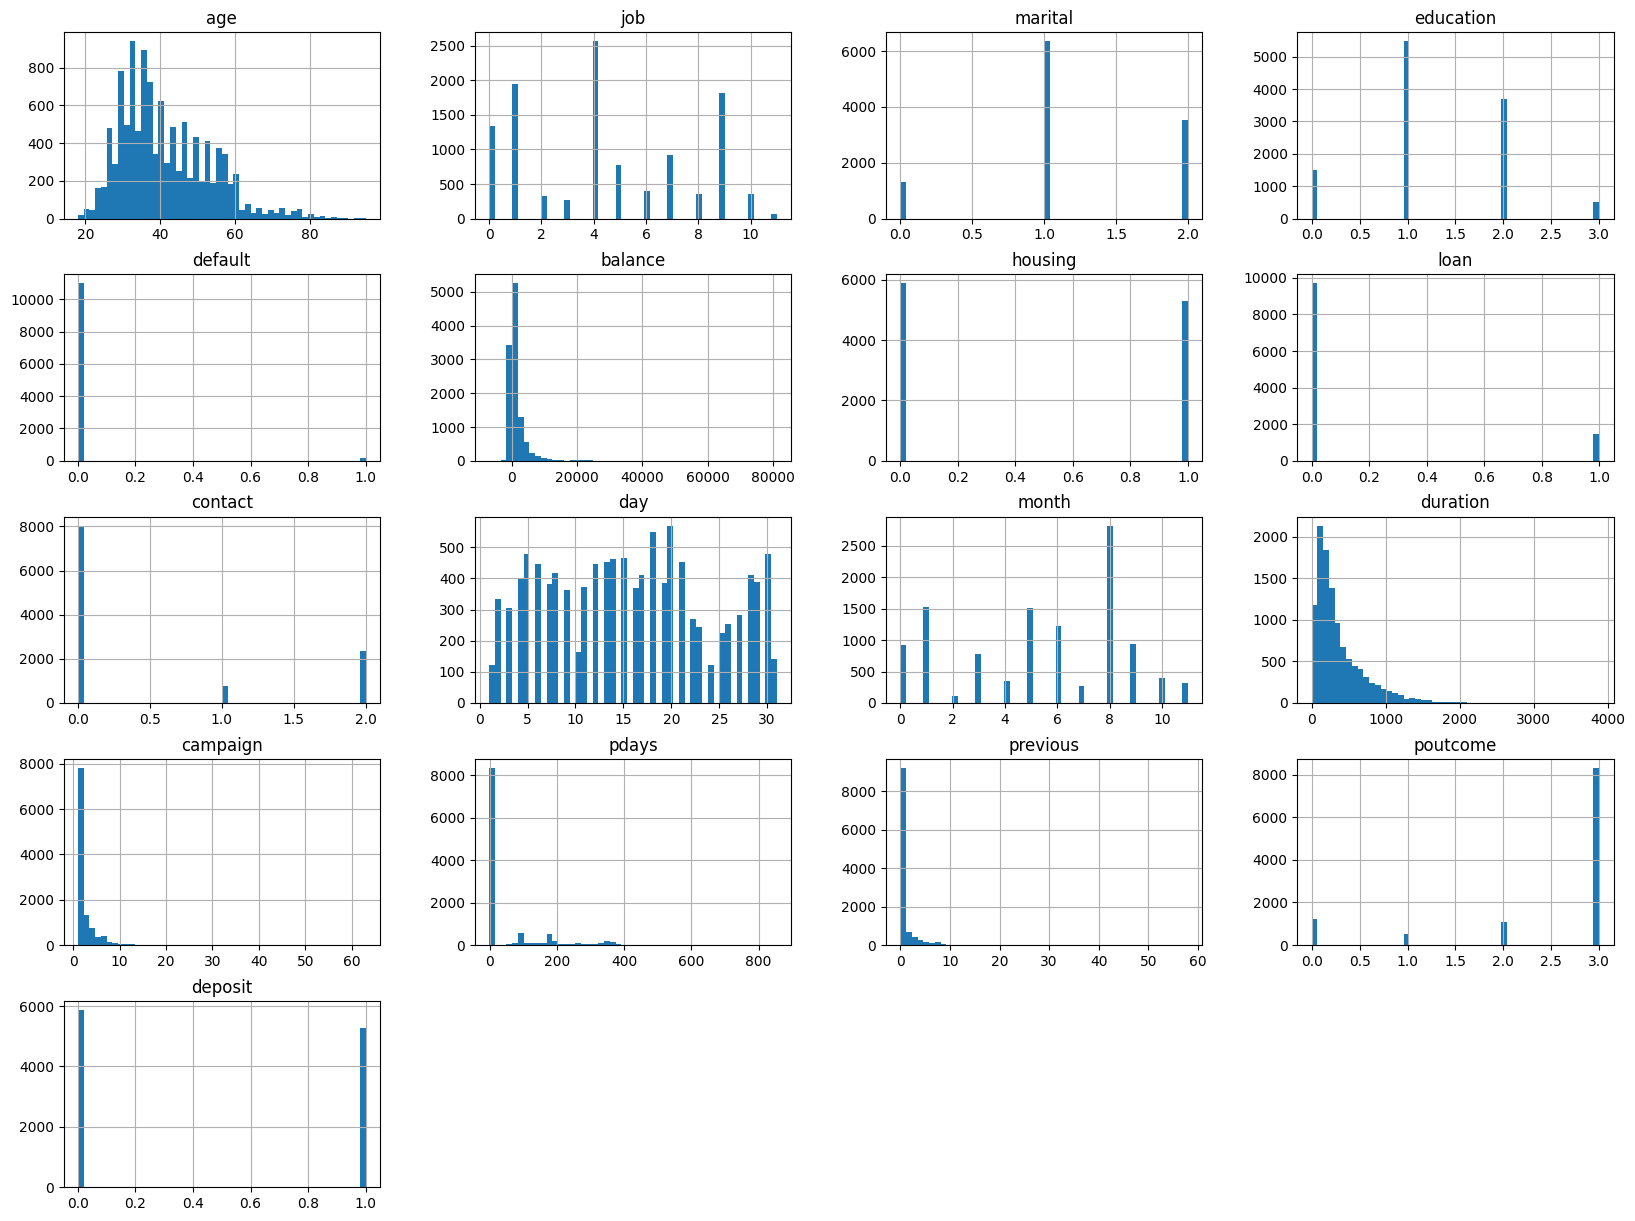

<Figure size 640x480 with 0 Axes>

In [ ]:
# Visualize distributions (histograms or density plots)
Bank_Customer_Data.hist(bins=50, figsize=(20, 15))
plt.title('Bank Customer Data Distribution')
plt.show()
plt.savefig('Bank Customer Data Distribution.png')


In [ ]:
# Determine the key features using Correlation Analysis,
corr_matrix = Bank_Customer_Data.corr()
print(corr_matrix)

                age       job   marital  education   default   balance  \
age        1.000000 -0.031603 -0.442782  -0.126018 -0.011425  0.112300   
job       -0.031603  1.000000  0.078314   0.147046 -0.007066  0.028736   
marital   -0.442782  0.078314  1.000000   0.125845 -0.014691 -0.002138   
education -0.126018  0.147046  0.125845   1.000000 -0.010709  0.051728   
default   -0.011425 -0.007066 -0.014691  -0.010709  1.000000 -0.060954   
balance    0.112300  0.028736 -0.002138   0.051728 -0.060954  1.000000   
housing   -0.168700 -0.136965 -0.036345  -0.109168  0.011076 -0.077092   
loan      -0.031418 -0.067092 -0.062029  -0.073154  0.076434 -0.084589   
contact    0.027762 -0.087915 -0.060456  -0.132540  0.035709 -0.027295   
day       -0.000762  0.026589 -0.003642   0.016759  0.017342  0.010467   
month     -0.026130 -0.076011 -0.004070  -0.055868  0.000950  0.007264   
duration   0.000189  0.002432  0.006781  -0.019122 -0.009760  0.022436   
campaign  -0.005278  0.003104 -0.03079

The correlation matrix of the bank customer data, revealed the following:
- Age and Balance: weak positive correlation (0.106), indicating that older customers tend to have higher balances.
- Age and Loan: Weakly positively correlated (0.085), suggesting that older customers are slightly more likely to have loans.
- Balance and Campaign: Weakly negatively correlated (-0.039), indicating that customers with higher balances tend to respond less to campaigns.
- Contact and Pdays: Moderately positively correlated (0.460), suggesting that customers who are contacted more frequently tend to have more past due days.
- Deposit and Duration: Moderately positively correlated (0.441), indicating that longer-term deposits tend to have higher durations.
- Education and Housing: weakly positively correlated (0.137), suggesting that customers with higher education levels tend to have better housing situations.
- Job and Marital: Weakly positively correlated (0.102), indicating that customers with better job situations tend to be married.
- Pdays and Previous: Strongly positively correlated (0.969), suggesting that customers with more past due days tend to have

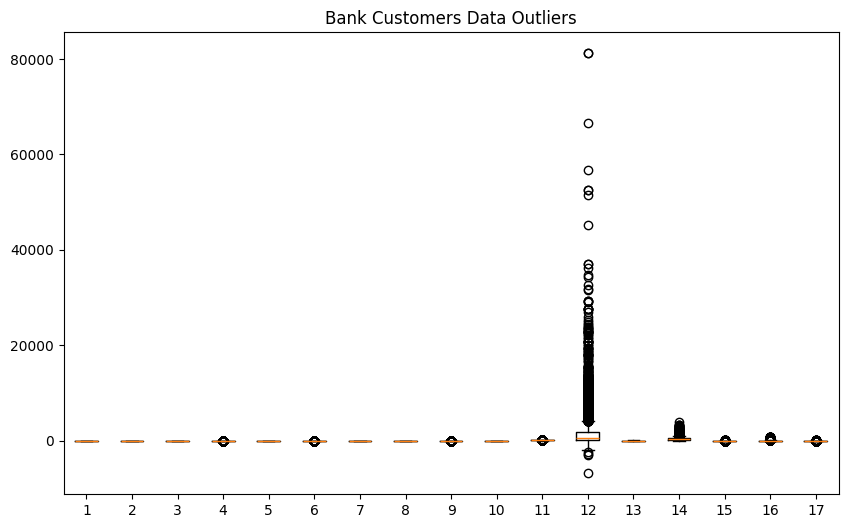

In [ ]:
# Visualize outliers using boxplots
plt.figure(figsize=(10, 6))
plt.boxplot(Bank_Customer_Data[['job', 'marital', 'education', 'default', 'housing', 'loan', 
                                                    'contact', 'month',	'poutcome',	'deposit', 
                                                    'age',	'balance',	'day', 'duration',	'campaign',	'pdays', 'previous']].values)
plt.title('Bank Customers Data Outliers')
plt.savefig('Bank Customers Data Boxplot.png')


In [ ]:
# splitting the dataset for testing and training

# Features and labels
X = Bank_Customer_Data.drop(columns=['deposit'])
y = Bank_Customer_Data['deposit']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.head()

age  job  marital  education  default  balance  housing  loan  contact  \
3955    28    8        2          2        0     5741        0     0        0   
11150   34    4        1          1        0      355        0     0        0   
5173    48   10        0          1        0      201        0     0        0   
3017    53    2        1          2        0     1961        0     0        0   
2910    53    4        1          2        0     1624        0     0        0   

       day  month  duration  campaign  pdays  previous  poutcome  
3955    10     11      1042         5    200         3         0  
11150   21      1       314         3     -1         0         3  
5173    10      9       594         1     91         1         2  
3017    15      2       351         1     -1         0         3  
2910    11      9       166         3     97         7         2

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler
scaler = StandardScaler()

# Normalize the features
X_normalized = scaler.fit_transform(X)

# Confirm normalization
print("\nMean of normalized features:")
print(X_normalized.mean(axis=0))
print("\nStandard deviation of normalized features:")
print(X_normalized.std(axis=0))


Mean of normalized features:
[ 2.74999518e-16  4.07406693e-17  6.87498795e-17 -6.62035876e-17
  4.07406693e-17  1.01851673e-17 -1.01851673e-16 -5.09258366e-18
  1.01851673e-16 -2.03703347e-17 -1.37499759e-16  8.14813386e-17
  3.05555020e-17  5.09258366e-18 -2.03703347e-17  1.32407175e-16]

Standard deviation of normalized features:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

model = Sequential()

# Input layer
model.add(Dense(units=128, activation="relu", input_shape=(16,)))

# First hidden layer
model.add(Dense(units=64, activation="relu"))
model.add(Dropout(0.3))

# Second hidden layer
model.add(Dense(units=32, activation="relu"))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(units=1, activation="sigmoid"))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# early stopping
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
# Train the model
history = model.fit(X_normalized, y, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)

Epoch 1/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7396 - loss: 0.5393 - val_accuracy: 0.6516 - val_loss: 0.6741
Epoch 2/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8184 - loss: 0.4307 - val_accuracy: 0.6950 - val_loss: 0.6251
Epoch 3/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8153 - loss: 0.4276 - val_accuracy: 0.7268 - val_loss: 0.5825
Epoch 4/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8327 - loss: 0.4073 - val_accuracy: 0.7541 - val_loss: 0.4778
Epoch 5/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8383 - loss: 0.3918 - val_accuracy: 0.7017 - val_loss: 0.5954
Epoch 6/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8301 - loss: 0.4089 - val_accuracy: 0.7201 - val_loss: 0.5580
Epoch 7/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8426 - loss: 0.3765 - val_accuracy: 0.7541 - val_loss: 0.4855
Epoch 8/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8322 - loss: 0.3926 - val_ac

In [ ]:
# model evaluation

loss, accuracy = model.evaluate(X_normalized, y)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8605 - loss: 0.3689
Test Loss: 0.4032
Test Accuracy: 0.8198


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42
)

# Predict on test data
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test Accuracy: 81.46%


In [ ]:
model.save('classification.h5')